In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
sns.set()
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv data files into dataframes

d1 = pd.read_csv(r"D:\Clinton files.py\My details\Fin_project\Singapore_flat_resale\ResaleFlatPricesBasedonApprovalDate19901999.csv")

d2 = pd.read_csv(r"D:\Clinton files.py\My details\Fin_project\Singapore_flat_resale\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

d3 = pd.read_csv(r"D:\Clinton files.py\My details\Fin_project\Singapore_flat_resale\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

d4 = pd.read_csv(r"D:\Clinton files.py\My details\Fin_project\Singapore_flat_resale\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

d5 = pd.read_csv(r"D:\Clinton files.py\My details\Fin_project\Singapore_flat_resale\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
# Shape of each dataframes

dfs=[d1,d2,d3,d4,d5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(172706, 11)


In [4]:
# Concatenating all the dataframes into one single dataframe

df = pd.concat([d1,d2,d3,d4,d5], ignore_index=True)

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
918904,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 10 months
918905,2024-02,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,820000.0,63 years 05 months
918906,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months
918907,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months


# Preprocessing the data

In [5]:
# Shape of the data

df.shape

(918909, 11)

In [6]:
# Information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918909 entries, 0 to 918908
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                918909 non-null  object 
 1   town                 918909 non-null  object 
 2   flat_type            918909 non-null  object 
 3   block                918909 non-null  object 
 4   street_name          918909 non-null  object 
 5   storey_range         918909 non-null  object 
 6   floor_area_sqm       918909 non-null  float64
 7   flat_model           918909 non-null  object 
 8   lease_commence_date  918909 non-null  int64  
 9   resale_price         918909 non-null  float64
 10  remaining_lease      209859 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.1+ MB


In [7]:
# finding the number of Unique values in each column

for col in df.columns[0:]:  
    print(col, ': ', (df[col].nunique()),'Unique Values')

month :  410 Unique Values
town :  27 Unique Values
flat_type :  8 Unique Values
block :  2705 Unique Values
street_name :  584 Unique Values
storey_range :  25 Unique Values
floor_area_sqm :  211 Unique Values
flat_model :  34 Unique Values
lease_commence_date :  56 Unique Values
resale_price :  9399 Unique Values
remaining_lease :  721 Unique Values


In [8]:
# Null values

df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

Droping the 'remaining_lease' column as majority of the rows lacks this value(data is available only from 2015)

In [9]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [10]:
# Map flat type values to 'MULTI GENERATION' if it is 'MULTI-GENERATION' and update the 'flat_type' column in the dataframe.

flat_type_mappings ={Type : 'MULTI GENERATION' if Type == 'MULTI-GENERATION'  else Type  for Type in df['flat_type']}

df['flat_type'] = df['flat_type'].map(flat_type_mappings)
df['flat_type'].value_counts()

4 ROOM              348864
3 ROOM              293910
5 ROOM              193548
EXECUTIVE            69148
2 ROOM               11599
1 ROOM                1300
MULTI GENERATION       540
Name: flat_type, dtype: int64

In [11]:
df['flat_model'].nunique()

34

In [12]:
# Create a mapping to convert each flat model to its uppercase equivalent

flat_model_mappings = {model : model.upper()  for model in df['flat_model']}

df['flat_model'] = df['flat_model'].map(flat_model_mappings)

df['flat_model'].nunique()

21

In [13]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m').dt.to_period('M')

In [14]:
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [15]:
# Extract the minimum storey and maximum storey from 'storey_range' and convert it to integer

df['minimum_storey']=df['storey_range'].str.split(' TO ').str[0].astype(int)
df['maximum_storey']=df['storey_range'].str.split(' TO ').str[1].astype(int)
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,10,12


In [16]:
df['is_remaining_lease'] = np.where(df['remaining_lease'].isna()==True, 0, 1)

In [17]:
# Replace NaN values in 'remaining_lease' with 'Not Specified'
df['remaining_lease'] = np.where(df['remaining_lease'].isna()==True, 'Not Specified', df['remaining_lease'])

In [18]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
minimum_storey         0
maximum_storey         0
is_remaining_lease     0
dtype: int64

In [19]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918904,2,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,MAISONETTE,1988,860000.0,63 years 10 months,2024,4,6,1
918905,2,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,APARTMENT,1988,820000.0,63 years 05 months,2024,4,6,1
918906,2,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,795000.0,62 years 11 months,2024,10,12,1
918907,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,MAISONETTE,1987,935000.0,62 years 10 months,2024,7,9,1


# Skewness

In [21]:
def skewness_plot(df, *column):
    nrow = len(column)
    plot_no=0
    for col_name in column:
        if 'sqrt' in col_name:
            title= "After Treating"
        else:
            title = "Before Treating"

        plt.figure(figsize=(16, 8))

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.boxplot(x=col_name, data=df, color='skyblue')  
        plt.title('Boxplot - '+ title)

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.distplot(df[col_name], color='salmon') 
        plt.title(f'Distplot - Skewness: {skew(df[col_name])}')

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.violinplot(x=col_name, data=df, color='lightgreen')  
        plt.title('Violinplot - ' + title)

    plt.tight_layout()
    
    return plt.show()


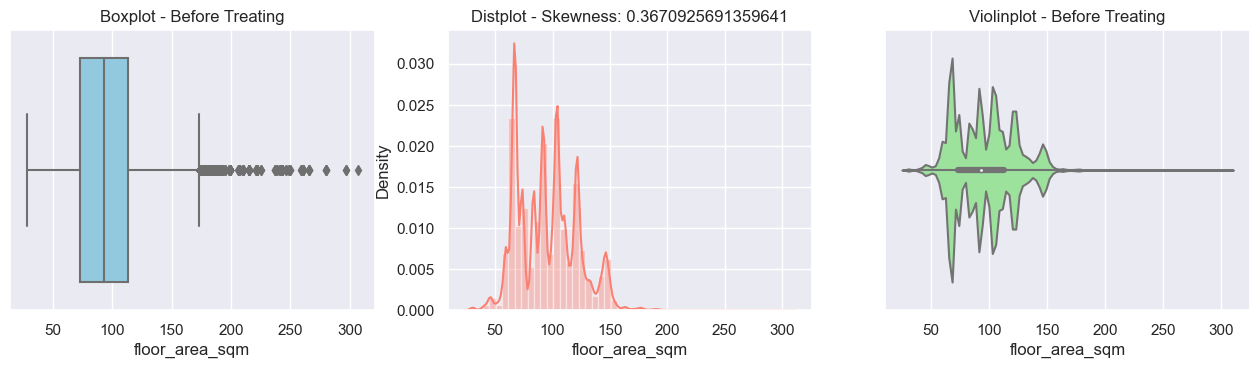

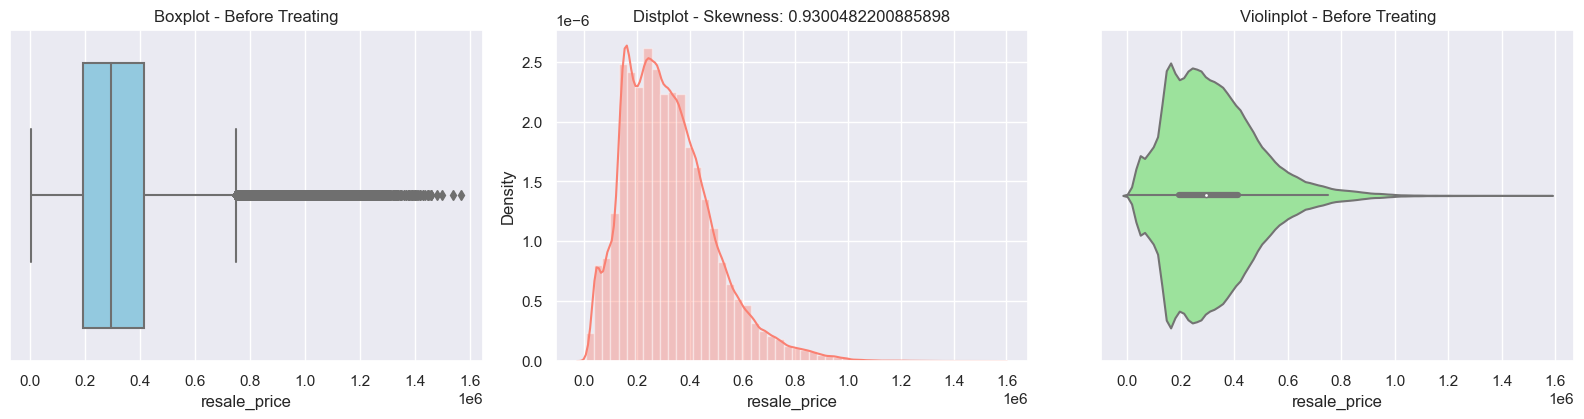

In [22]:
numerical_columns = ['floor_area_sqm', 'resale_price']
skewness_plot(df, *numerical_columns)

In [23]:
def Square_Root_Transformation(df, *column):

    for col_name in column:
        # Square Root Tansformation
        df[col_name+'_sqrt'] = np.sqrt(df[col_name])
        

    column =[i for i in df.columns if 'sqrt' in i]

    return skewness_plot(df, * column)

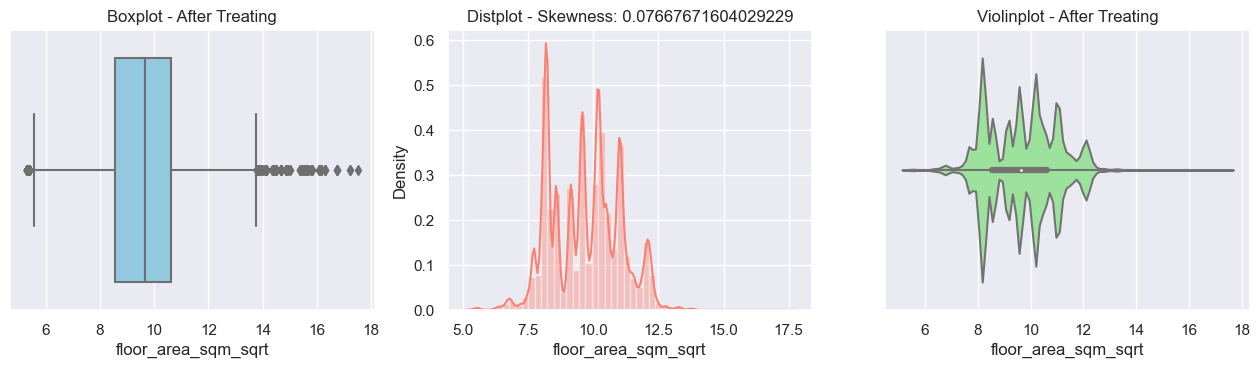

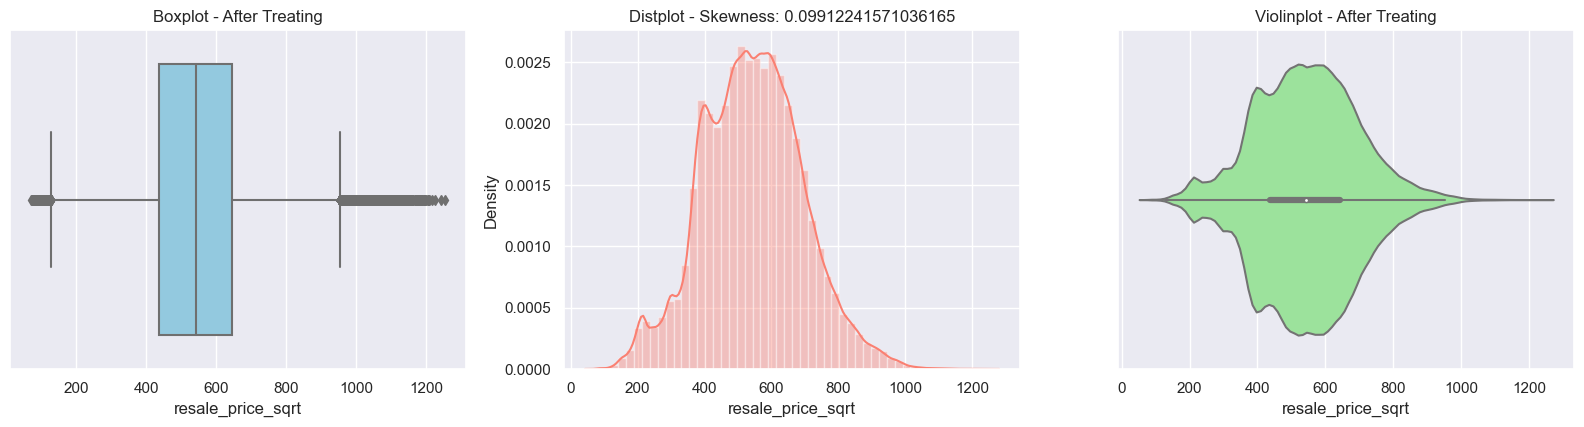

In [24]:
Square_Root_Transformation(df, *numerical_columns)

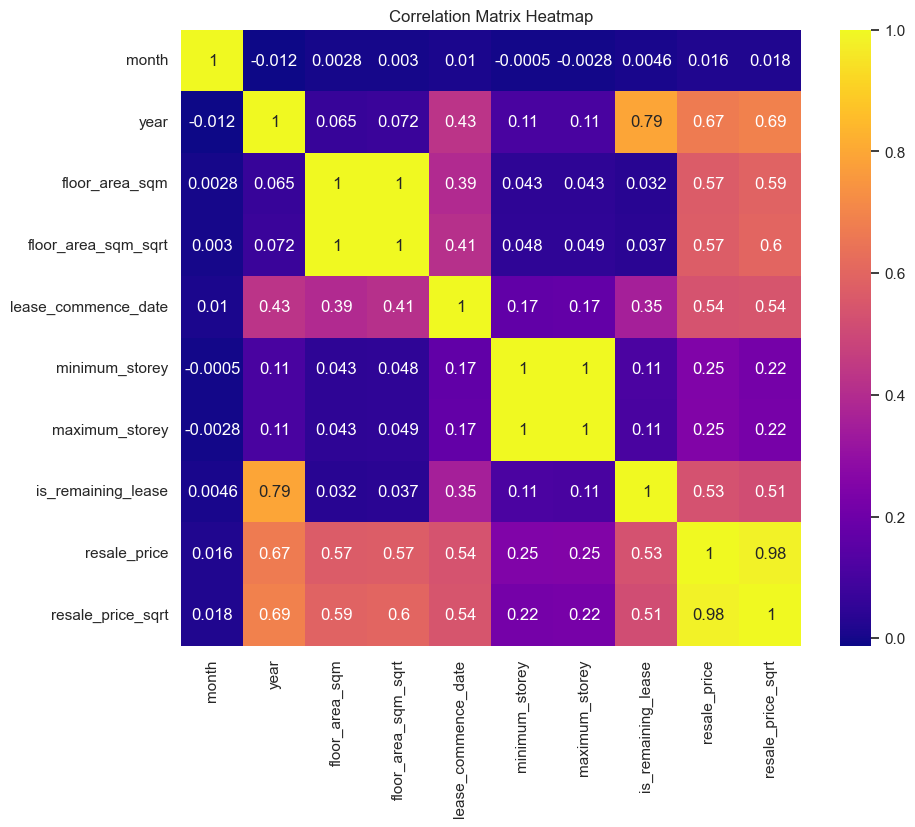

In [25]:
# Generate a heatmap to visualize the correlation matrix for the specified columns
column_name = ['month', 'year', 'floor_area_sqm', 'floor_area_sqm_sqrt', 'lease_commence_date', 'minimum_storey','maximum_storey',
               'is_remaining_lease', 'resale_price', 'resale_price_sqrt']
plt.figure(figsize=(10, 8)) 
sns.heatmap(df[column_name].corr(), annot=True, cmap='plasma')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outliers

In [26]:
df.shape

(918909, 17)

In [27]:
# Plotting Boxplots

def outlier_plot(df):

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='floor_area_sqm', data=df, color='skyblue')
    plt.title('Boxplot - floor area sqm')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='floor_area_sqm_sqrt', data=df, color='salmon')
    plt.title('Boxplot - floor area sqm sqrt')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='resale_price', data=df, color='lightgreen')
    plt.title('Boxplot - '+ 'resale price')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='resale_price_sqrt', data=df, color='orange')
    plt.title('Boxplot - '+ 'resale price sqrt')
    plt.tight_layout()
    
    return plt.show()

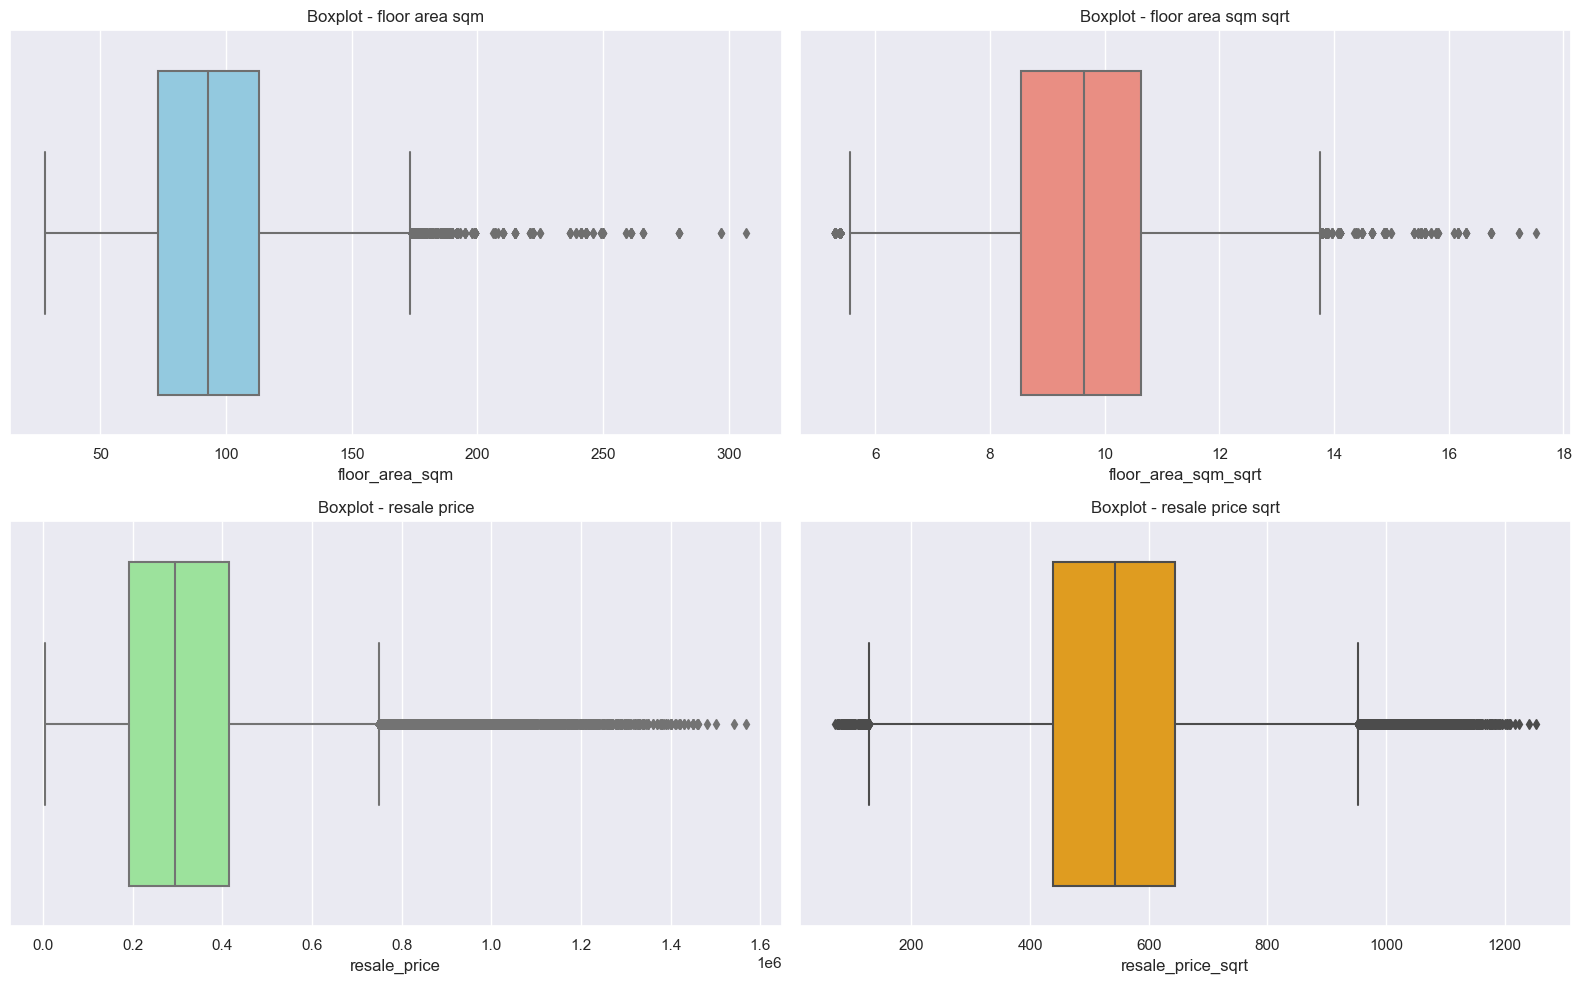

In [28]:
outlier_plot(df)

In [29]:
# Identify and handle outliers in specified numerical columns using the quantile-based method.

def outlier_quantile(df, *column):

    for col_name in column:
        #Finding the IQR
        percentile25 = df[col_name].quantile(0.25)
        percentile75 = df[col_name].quantile(0.75)
        iqr = percentile75 - percentile25

        # Define upper and lower limits for outlier detection
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        # Cap values beyond upper and lower limits
        df[col_name] = np.where(df[col_name] > upper_limit, upper_limit, df[col_name])
        df[col_name] = np.where(df[col_name] < lower_limit, lower_limit, df[col_name])

    return outlier_plot(df)

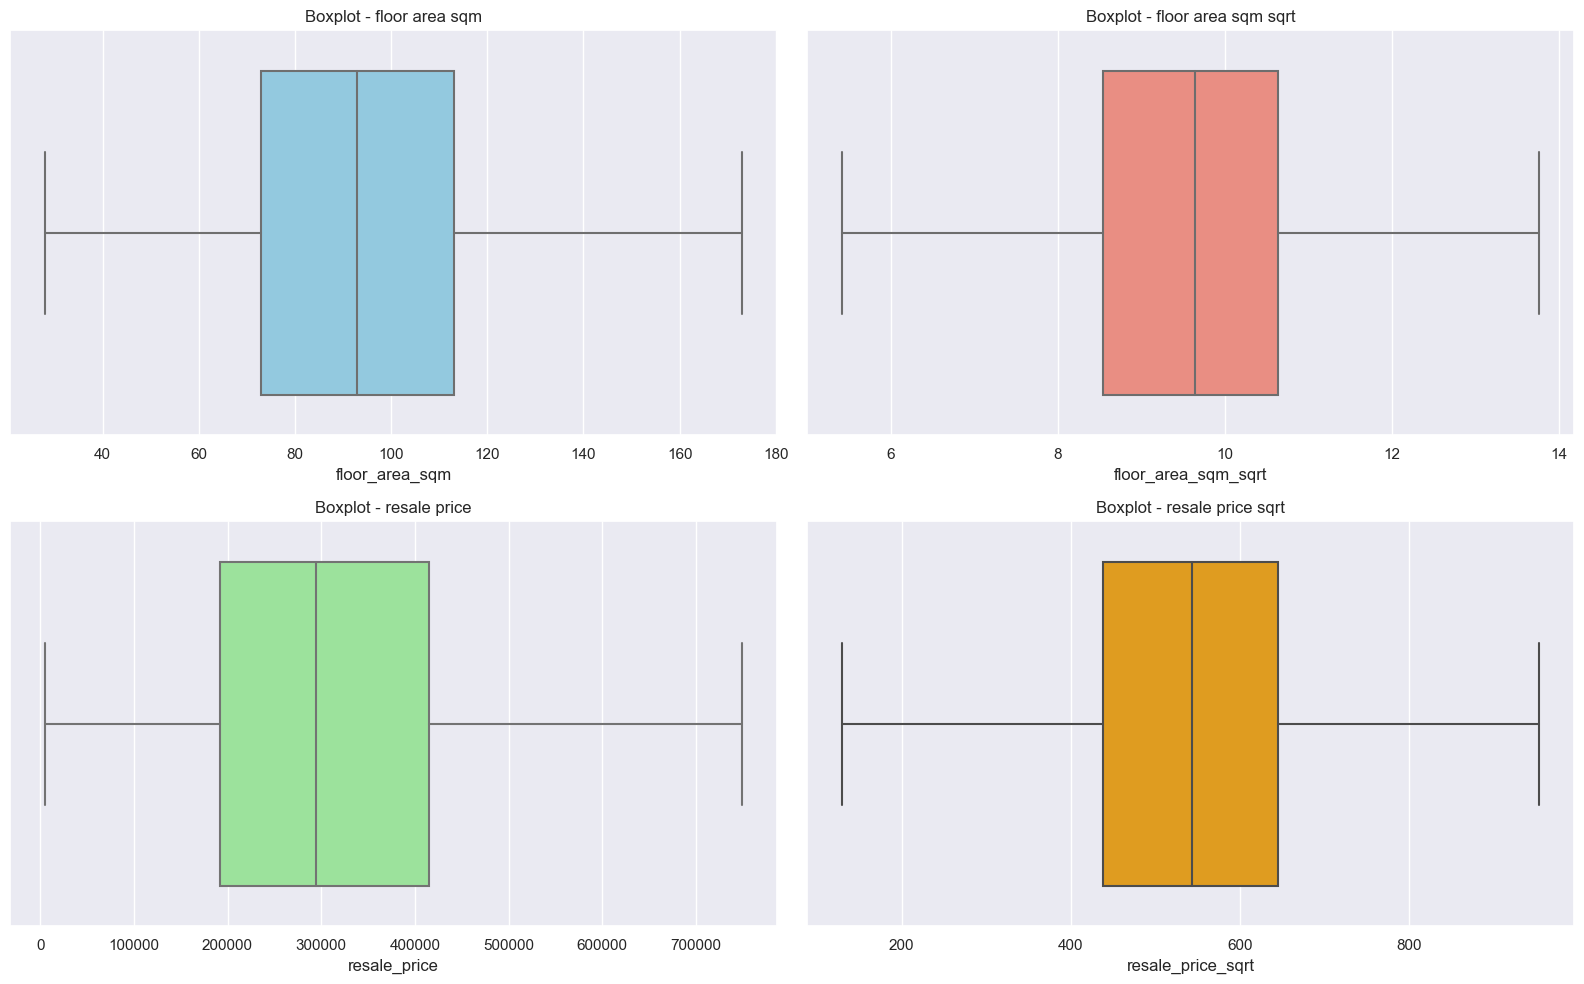

In [30]:
column_name = [ 'floor_area_sqm', 'floor_area_sqm_sqrt', 'resale_price', 'resale_price_sqrt']
outlier_quantile(df, *column_name)

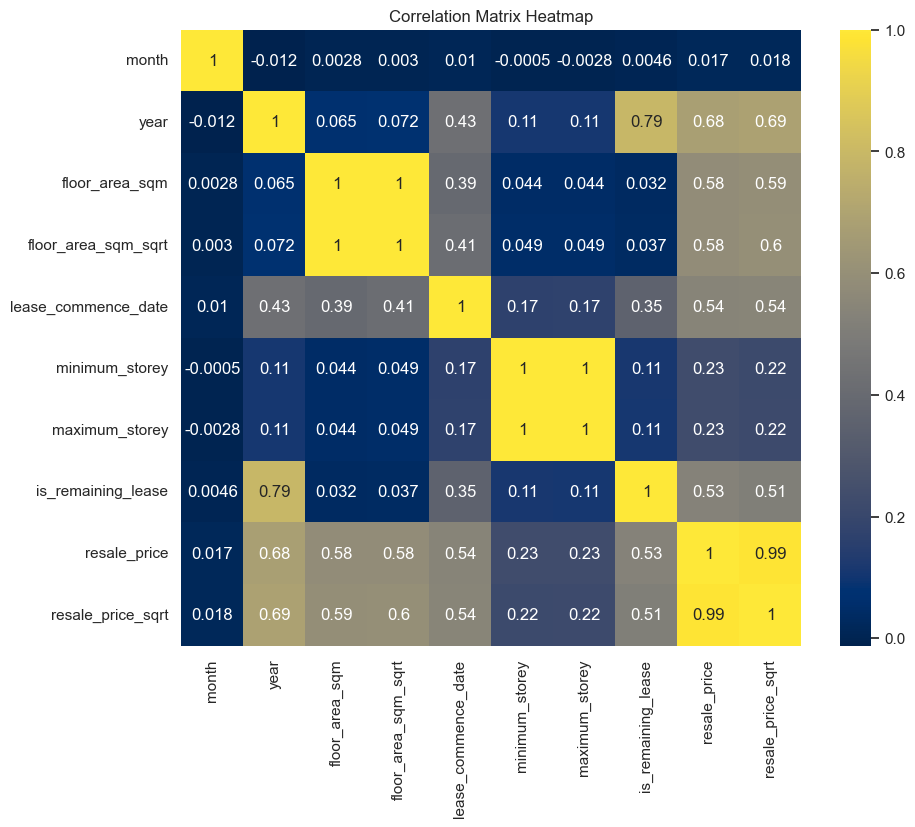

In [31]:
column_name = ['month', 'year', 'floor_area_sqm', 'floor_area_sqm_sqrt', 'lease_commence_date', 'minimum_storey','maximum_storey',
               'is_remaining_lease', 'resale_price', 'resale_price_sqrt']
plt.figure(figsize=(10, 8)) 
sns.heatmap(df[column_name].corr(), annot=True, cmap='cividis')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Regression

In [32]:
df1 = df.copy()
df1['remaining_lease'] = df1['remaining_lease'].astype(str)
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,0,5.567764,129.137711
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,0,5.567764,129.137711
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,0,5.567764,129.137711
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,0,5.567764,129.137711
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,0,8.544004,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918904,2,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,MAISONETTE,1988,749500.0,63 years 10 months,2024,4,6,1,12.083046,927.361850
918905,2,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,APARTMENT,1988,749500.0,63 years 05 months,2024,4,6,1,11.916375,905.538514
918906,2,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,749500.0,62 years 11 months,2024,10,12,1,11.916375,891.627725
918907,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,MAISONETTE,1987,749500.0,62 years 10 months,2024,7,9,1,12.083046,953.245272


In [33]:
df1.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
year                     int64
minimum_storey           int32
maximum_storey           int32
is_remaining_lease       int32
floor_area_sqm_sqrt    float64
resale_price_sqrt      float64
dtype: object

In [34]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

# Specify categorical column names for ordinal encoding
column_names = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'remaining_lease']

# Dictionary to store unique values before and after ordinal encoding
unique_value ={}
for col_name in column_names:
    data = df1[col_name].unique()
    data.sort()

    df1[col_name] = enc.fit_transform(df1[[col_name]])

    globals()[col_name] = {}
    for i in df1[col_name].unique():
        globals()[col_name][data[int(i)]] = i
        unique_value[f'{col_name}'] = globals()[col_name]
    # print(globals()[col_name])
unique_value

{'town': {'ANG MO KIO': 0.0,
  'BEDOK': 1.0,
  'BISHAN': 2.0,
  'BUKIT BATOK': 3.0,
  'BUKIT MERAH': 4.0,
  'BUKIT TIMAH': 6.0,
  'CENTRAL AREA': 7.0,
  'CHOA CHU KANG': 8.0,
  'CLEMENTI': 9.0,
  'GEYLANG': 10.0,
  'HOUGANG': 11.0,
  'JURONG EAST': 12.0,
  'JURONG WEST': 13.0,
  'KALLANG/WHAMPOA': 14.0,
  'MARINE PARADE': 16.0,
  'QUEENSTOWN': 19.0,
  'SENGKANG': 21.0,
  'SERANGOON': 22.0,
  'TAMPINES': 23.0,
  'TOA PAYOH': 24.0,
  'WOODLANDS': 25.0,
  'YISHUN': 26.0,
  'LIM CHU KANG': 15.0,
  'SEMBAWANG': 20.0,
  'BUKIT PANJANG': 5.0,
  'PASIR RIS': 17.0,
  'PUNGGOL': 18.0},
 'flat_type': {'1 ROOM': 0.0,
  '3 ROOM': 2.0,
  '4 ROOM': 3.0,
  '5 ROOM': 4.0,
  '2 ROOM': 1.0,
  'EXECUTIVE': 5.0,
  'MULTI GENERATION': 6.0},
 'block': {'309': 829.0,
  '216': 447.0,
  '211': 430.0,
  '202': 388.0,
  '235': 532.0,
  '232': 521.0,
  '308': 825.0,
  '220': 468.0,
  '219': 462.0,
  '247': 548.0,
  '320': 883.0,
  '252': 558.0,
  '223': 478.0,
  '230': 509.0,
  '329': 921.0,
  '313': 849.0,
  '117

In [ ]:
import json

# Write the unique_value dictionary to a JSON file with proper indentation

with open('Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_value, file , indent = 4)

In [35]:
df1.dtypes

month                    int64
town                   float64
flat_type              float64
block                  float64
street_name            float64
storey_range           float64
floor_area_sqm         float64
flat_model             float64
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
minimum_storey           int32
maximum_storey           int32
is_remaining_lease       int32
floor_area_sqm_sqrt    float64
resale_price_sqrt      float64
dtype: object

In [36]:
# Importing required libraries for modelling

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [37]:
class regression:

    def __init__(self, x, y):
        # List of regression models to be evaluated
        self.models =[('AdaBoostRegressor', AdaBoostRegressor()),
                    #  ('RandomForestRegressor', RandomForestRegressor()),
                    #  ('ExtraTreesRegressor', ExtraTreesRegressor()),
                     ('GradientBoostingRegressor', GradientBoostingRegressor()),
                     ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
                     ('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('XGBRegressor', XGBRegressor()),
                     ('LinearRegression', LinearRegression()),
                     ('KNeighborsRegressor', KNeighborsRegressor()),
                     ('MLPRegressor', MLPRegressor()),
                     ]
        # Split the data into training and testing sets
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x,y,test_size=0.2, random_state = 42)
    
    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)
            
            data ={'Model_Name': model_name,
                    'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                    'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                    'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                    'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            result.append(data)
            
        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [38]:
y = df1['resale_price_sqrt']
x = df1.drop(['resale_price_sqrt', 'resale_price'], axis =1)

In [39]:
# Create an instance of the 'regression' class with input features 'x' and target variable 'y'
regression_models = regression(x,y)
# Apply the 'all_model' method to train and evaluate various regression models
r_models = regression_models.all_model()
r_models

(735127, 15) (183782, 15) (735127,) (183782,)


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,3915.4072,3945.9537,50.2825,50.4540,0.8239,0.8231
1,GradientBoostingRegressor,1471.0553,1479.9858,28.3669,28.4536,0.9338,0.9336
2,HistGradientBoostingRegressor,628.9608,633.6943,18.7348,18.7994,0.9717,0.9716
3,DecisionTreeRegressor,4.2432,617.8050,0.3206,17.3677,0.9998,0.9723
4,XGBRegressor,390.7892,400.1934,14.7739,14.9370,0.9824,0.9821
5,LinearRegression,4315.5826,4345.4522,51.6723,51.8197,0.8059,0.8052
6,KNeighborsRegressor,1163.0350,1846.0532,23.6255,29.8491,0.9477,0.9172
7,MLPRegressor,4268.8249,4293.1058,51.7275,51.8635,0.8080,0.8075


### Lowest Test MSE and MAE:

DecisionTreeRegressor has the lowest test MSE and MAE, suggesting good performance in terms of minimizing prediction errors.


### High R-squared (R2) Score:

Models like GradientBoostingRegressor, HistGradientBoostingRegressor, and XGBRegressor have high R2 scores, indicating a good ability to explain the variance in the resale prices.

Among GradientBoostingRegressor, HistGradientBoostingRegressor, and XGBRegressor, XGBRegressor is often considered the best choice due to its superior performance, efficiency, and flexibility in handling diverse datasets.

In [40]:
r_models['Train_Mean_Square_Error'] - r_models['Test_Mean_Square_Error'],

(0    -30.5465
 1     -8.9305
 2     -4.7335
 3   -613.5618
 4     -9.4042
 5    -29.8696
 6   -683.0182
 7    -24.2809
 dtype: float64,)

In [41]:
# Extract the training and testing sets from the instance for further analysis
x_train, x_test, y_train, y_test = regression_models.x_train, regression_models.x_test, regression_models.y_train, regression_models.y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((735127, 15), (183782, 15), (735127,), (183782,))

In [42]:
# XGBRegressor 

model = XGBRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 390.7892, 'Test_Mean_Square_Error': 400.1934}


In [43]:
# Hyperparameter tuning for XGBRegressor

# Define the parameter grid

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# Create the XGBRegressor

xgb_reg = XGBRegressor()

# Use GridSearchCV to perform the search

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Get the best parameters and the best model

best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set

y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
best_params

Mean Squared Error on Test Set: 545.3305992459038


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [44]:
# XBGRegressore with Hyperparameter

xgb_model = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 200)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.9755488491396864, 'Mean Absolute Error': 17.39763830742935, 'Mean Squared Error': 545.3305992459038, 'Root Mean Squared Error': 23.352314644289628}


In [45]:
# DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 4.2432, 'Test_Mean_Square_Error': 615.4518}


In [46]:
# Hyperparameter tuning

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to perform the search
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(best_model, best_params)

Mean Squared Error on Test Set: 490.1988078435501
DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42) {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [47]:
# DecisionTreeRegressor with Hyperparameter

decision_tree_model = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10,)
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.978045979384741, 'Mean Absolute Error': 15.475556992807409, 'Mean Squared Error': 489.63745250159394, 'Root Mean Squared Error': 22.12775299260171}


In [48]:
# Resale Price Prediction

data = np.array([[11, 1.0,4.0, 286.0, 39, 4.0,110.0, 5.0, 2006.0, 719, 2009.0, 7.0, 9.0, 0.0, 10.488]])
data.shape
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

XGBRegressor -> Resale Price : $ 518351.57339662686
DecisionTreeRegressor -> Resale Price : $ 502343.99305646453


In [49]:
column_name = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
                'remaining_lease', 'year', 'minimum_storey', 'maximum_storey', 'is_remaining_lease', 'floor_area_sqm_sqrt', ]
test_data =df1.iloc[0: :50000][column_name].values
test_result = df1.iloc[0: :50000][['resale_price']]
dt_y=decision_tree_model.predict(test_data)**2
xgb_y = xgb_model.predict(test_data)**2

In [50]:
# Comparing Predicted DecisionTreeRegressor, XGBRegressor resale price with Actual resale price

pred =pd.DataFrame(zip(df1.iloc[0: :50000]['resale_price'], dt_y, xgb_y), columns= ['Actual_resale_price', 'DecisionTreeRegressor', 'XGBRegressor'])
pred['XGBRegressor_Difference'] = pred['XGBRegressor'] - pred['Actual_resale_price']
pred['DecisionTreeRegressor_Difference'] = pred['DecisionTreeRegressor'] - pred['Actual_resale_price']
pred

,Actual_resale_price,DecisionTreeRegressor,XGBRegressor,XGBRegressor_Difference,DecisionTreeRegressor_Difference
0,9000.0,16676.548275,18402.597656,9402.597656,7676.548275
1,77000.0,71611.296157,73877.718750,-3122.281250,-5388.703843
2,388000.0,317675.619755,389799.468750,1799.468750,-70324.380245
3,163000.0,155899.113036,148992.234375,-14007.765625,-7100.886964
4,197500.0,190037.461135,187661.609375,-9838.390625,-7462.538865
5,235000.0,247127.144595,239475.968750,4475.968750,12127.144595
6,248000.0,248352.982547,258021.312500,10021.312500,352.982547
7,255000.0,281218.496716,301023.281250,46023.281250,26218.496716
8,227000.0,225322.002915,241884.187500,14884.187500,-1677.997085
9,245000.0,235194.593373,247629.328125,2629.328125,-9805.406627


With help of above dataframe DecisionTreeRegressor's predicted resale price is near to the Actual resale price. That's I am going to choose 'DecisionTreeRegressor' for resale price prediction

In [ ]:
# Save the Decision Tree model to a file
import pickle

with open('Decision_Tree_Model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file) 

In [53]:
# Load the Decision Tree model from the file
import pickle
with open('Decision_Tree_Model.pkl', 'rb' ) as file:
    reg_model = pickle.load(file)

In [54]:
# Make a prediction using the loaded model

data = np.array([[11, 1.0,4.0, 286.0, 39, 4.0,110.0, 5.0, 2006.0, 719, 2009.0, 7.0, 9.0, 0.0, 10.488]])

print( 'Resale Price : $', reg_model.predict(data)[0]**2)

Resale Price : $ 502343.99305646453
